### Muhammad Helmi Hibatullah
#### 13520014
#### K02

In [4]:
class Point:
    """ 
    This class defines points in two dimensions plus saves an order
    number so that it can be used by matplotlib.
    
    Attributes and constructor parameters:
        x (float): x-axis coordinate.
        y (float): y-axis coordinate.
        order (int): serial number of a point.
    """
    def __init__(self, x, y, order):
        self.x = float(x)
        self.y = float(y)
        self.order = order
        
    def __str__(self):
        return "[" + str(self.x) + ", " + str(self.y) +"] " + str(self.order)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def get_order(self):
        return self.order
        
        
class Line:
    """ 
    This class defines a line between two points.
    
    Attributes:
        p1 (Point): first point.
        p2 (Point): second point.
        order_pair (array of int): a pair of point serial number.
    """
    def __init__(self, p1, p2):
        """ 
        The constructor for Line class.
        
        Paramaters:
            p1 (Point): first point.
            p2 (Point): second point.
        """
        self.p1 = p1
        self.p2 = p2
        self.order_pair = [p1.get_order(), p2.get_order()]
    
    def get_order_pair(self):
        return self.order_pair
    
    def __str__(self):
        return "[[" + str(self.p1.getX()) + ", " + str(self.p1.getY()) +"], " + "[" + str(self.p2.getX()) + ", " + str(self.p2.getY()) +"]]"

    def __eq__(self, other):
        return self.p1 == other.p1 and self.p2 == other.p2


class myConvexHull:
    """ 
    Convex hulls in two dimensions.
    
    Attributes:
        points (array of Points): coordinates of points to construct a convex hull from.
        solution (array of Lines): vertices that form a convex hull.
        simplices (array of int): indices of points forming the simplical facets of the convex hull. 
    """
    def __init__(self, points):
        """ 
        Constructor of myConvexHull Class.
        
        Parameters:
            points (array of Points): coordinates of points to construct a convex hull from.
        """
        self.points = []
        i = 0
        for point in points:
            self.points.append(Point(point[0], point[1], i))
            i += 1
        self.solution = []
        self.solve()
        self.simplices = []
        for line in self.solution:
            self.simplices.append(line.get_order_pair())
        
    def partition(self, left_index, right_index):
        """ 
        Function that partitioning an array of Points for quick sort purpose.
        
        Parameters:
            left_index (int): start index
            right_index (int): last index
        """
        pivot_index = right_index
        pivot = self.points[pivot_index]
        right_index -= 1
        
        while True:
            while self.points[left_index].getX() < pivot.getX():
                left_index += 1
            
            while self.points[right_index].getX() > pivot.getX():
                right_index -= 1
                
            if left_index >= right_index:
                break
            else:
                point_temp = self.points[left_index]
                self.points[left_index] = self.points[right_index]
                self.points[right_index] = point_temp
            
            left_index += 1
        
        point_temp = self.points[left_index]
        self.points[left_index] = self.points[pivot_index]
        self.points[pivot_index] = point_temp
        
        return left_index
        
    def quicksort(self, left_index, right_index):
        """ 
        Function to perform quick sort on an array of Points.
        
        Parameters:
            left_index (int): start index
            right_index (int): last index
        """
        if right_index - left_index <= 0:
            return
        
        pivot_index = self.partition(left_index, right_index)
        self.quicksort(left_index, pivot_index - 1)
        self.quicksort(pivot_index + 1, right_index)
            
    def determinant(self, p1, p2, p3):
        """ 
        Function to calculate determinants to check if point p3 is on the left (or above)
        or on the right (or below) a line between two points p1 and p2.
        
        Parameters:
            p1 (Point): first point
            p2 (Point): second point
            p3 (Point): point to check
        """
        # x1*y2 + x3*y1 + x2*y3 - x3*y2 - x2*y1 - x1*y3
        return p1.getX()*p2.getY() + p3.getX()*p1.getY() + p2.getX()*p3.getY() - p3.getX()*p2.getY() - p2.getX()*p1.getY() - p1.getX()*p3.getY()
    
    def distance(self, p1, p2, p3):
        """ 
        Function to calculate distance between a point p3 and a line between
        two points p1 and p2.
        
        Parameters:
            p1 (Point): first point
            p2 (Point): second point
            p3 (Point): point to check
        """
        return abs(((p2.getX()-p1.getX()) * (p1.getY()-p3.getY())) - ((p1.getX()-p3.getX())*(p2.getY()-p1.getY()))) / (((p2.getX()-p1.getX())**2 + (p2.getY()-p1.getY())**2)**0.5)
        
    def solve(self):
        """ 
        Procedure to find the solutions using the divide and conquer approach
        """ 
        # Sort the array of points
        self.quicksort(0, len(self.points) - 1) 
        N = len(self.points)
        
        leftmost_p = self.points[0]
        rightmost_p = self.points[N-1]
        
        # put the Line between the leftmost point and the rightmost point
        # to the solution set 
        self.solution.append(Line(leftmost_p, rightmost_p))
        self.solution.append(Line(rightmost_p, leftmost_p))
        
        # devide the array of points using the determinant
        s1 = []
        s2 = []
        for i in range(1, N-1):
            if self.determinant(leftmost_p, rightmost_p, self.points[i]) > 0:
                s1.append(self.points[i])
            elif self.determinant(leftmost_p, rightmost_p, self.points[i]) < 0:
                s2.append(self.points[i])
        
        # process each set using a recursive method
        self.convex_hull_recursive(s1, leftmost_p, rightmost_p)
        self.convex_hull_recursive(s2, rightmost_p, leftmost_p)
        
        
    def convex_hull_recursive(self, points, leftmost, rightmost):
        """ 
        Procedure for conducting further searches for 
        solutions using a divide and conquer approach and a recursive method
        
        Parameters:
            points (array of Points): coordinates of points to construct a convex hull from.
            leftmost (Point): the leftmost point.
            rightmost (Point): the rightmost point.
        """ 
        if len(points) == 0:
            return
        else:
            # Find the point that is the farthest away from the line between
            # the leftmost and rightmost points
            farthest_p_dist = -999
            farthest_p = None
            for i in range(len(points)):
                temp = self.distance(leftmost, rightmost, points[i])
                if (temp > farthest_p_dist and temp > 0 and farthest_p != leftmost and farthest_p != rightmost):
                    farthest_p_dist = temp
                    farthest_p = points[i]

            if farthest_p:
                # replace the solution set with the new one
                temp = Line(leftmost, rightmost)
                self.solution.insert(self.solution.index(temp),Line(leftmost, farthest_p))
                self.solution.insert(self.solution.index(temp),Line(farthest_p, rightmost))
                self.solution.remove(temp)
                    
                # take all the points on the left of the line    
                s11 = []
                s12 = []
                
                for i in range(0, len(points)):
                    if self.determinant(leftmost, farthest_p, points[i]) > 0:
                        s11.append(points[i])
                    if self.determinant(farthest_p, rightmost, points[i]) > 0:
                        s12.append(points[i])
                
                # process each point set
                self.convex_hull_recursive(s11, leftmost, farthest_p)
                self.convex_hull_recursive(s12, farthest_p, rightmost)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

print("1. Iris")
print("2. Wine")
print("3. Digits")
print("4. Breast Cancer")
user_pick = int(input("Pick a dataset (1-4): "))
isValid = True
if user_pick == 1:
    data = datasets.load_iris()
elif user_pick == 2:
    data = datasets.load_wine()
elif user_pick == 3:
    data = datasets.load_digits()
elif user_pick == 4:
    data = datasets.load_breast_cancer()
else:
    print("Unkown input.")
    isValid = False

if isValid:
    # create a DataFrame
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['Target'] = pd.DataFrame(data.target)
    df

1. Iris
2. Wine
3. Digits
4. Breast Casncer


Please pick two different features to be compared.
1. sepal length (cm)
2. sepal width (cm)
3. petal length (cm)
4. petal width (cm)


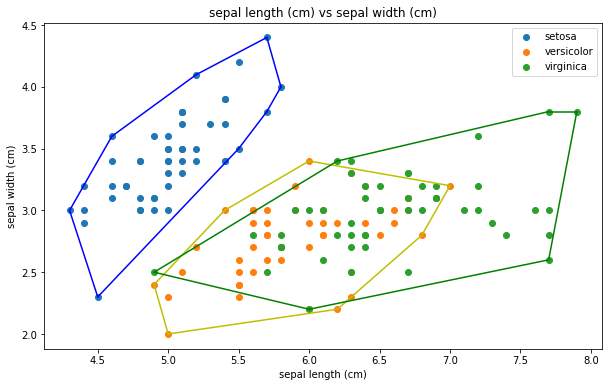

In [9]:
if isValid:
    # Visualization
    plt.figure(figsize = (10, 6))
    colors = ['b', 'y', 'g', 'r', 'c', 'm', 'k']

    print("Please pick two different features to be compared.")
    i = 0
    while i < len(data.feature_names):
        print(f"{i+1}. {data.feature_names[i]}")    
        i += 1
    feature_pick_1 = int(input(f"First pick(1-{i}): "))
    feature_pick_2 = int(input(f"Second pick(1-{i}): "))

    if feature_pick_1 == feature_pick_2 or feature_pick_1 > i+1 or feature_pick_1 < 1 or feature_pick_2 > i+1 or feature_pick_2 < 1:
        isValid = False
    
    if isValid:
        plt.title(f'{data.feature_names[feature_pick_1-1]} vs {data.feature_names[feature_pick_2-1]}')
        plt.xlabel(data.feature_names[feature_pick_1-1])
        plt.ylabel(data.feature_names[feature_pick_2-1])
        for i in range(len(data.target_names)):
            bucket = df[df['Target'] == i]
            bucket = bucket.iloc[:,[0,1]].values
            hull = myConvexHull(bucket)
            plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
            for simplex in hull.simplices:
                plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i%7])
        plt.legend()

## Iris Dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
df1 = pd.DataFrame(iris.data, columns=iris.feature_names)
df1['Target'] = pd.DataFrame(iris.target)
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Petal Length vs Petal Width

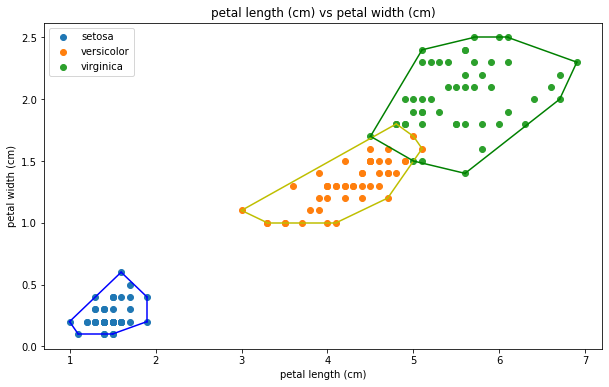

In [6]:
plt.figure(figsize = (10, 6))
colors = ['b', 'y', 'g', 'r', 'c', 'm', 'k']
plt.title(f'{iris.feature_names[2]} vs {iris.feature_names[3]}')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
for i in range(len(iris.target_names)):
    bucket = df1[df1['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=iris.target_names[i])
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i%7])
plt.legend()

### Sepal Length vs Sepal Width

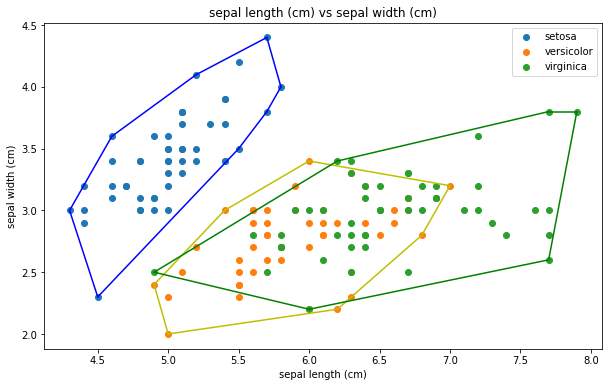

In [7]:
plt.figure(figsize = (10, 6))
colors = ['b', 'y', 'g', 'r', 'c', 'm', 'k']
plt.title(f'{iris.feature_names[0]} vs {iris.feature_names[1]}')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
for i in range(len(iris.target_names)):
    bucket = df1[df1['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=iris.target_names[i])
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i%7])
plt.legend()

## Breast Cancer Dataset

In [8]:
breast_cancer = datasets.load_breast_cancer()
df2 = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df2['Target'] = pd.DataFrame(breast_cancer.target)
df2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Mean Radius vs Mean Texture

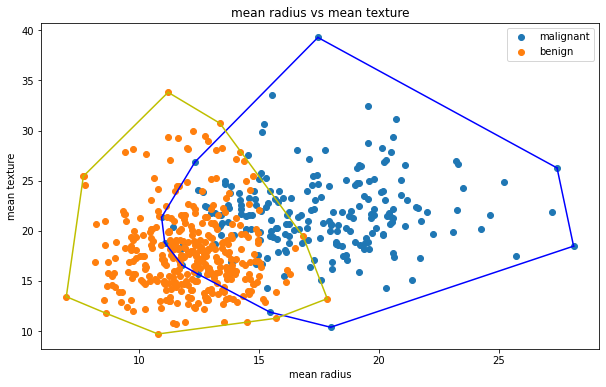

In [9]:
plt.figure(figsize = (10, 6))
colors = ['b', 'y', 'g', 'r', 'c', 'm', 'k']
plt.title(f'{breast_cancer.feature_names[0]} vs {breast_cancer.feature_names[1]}')
plt.xlabel(breast_cancer.feature_names[0])
plt.ylabel(breast_cancer.feature_names[1])
for i in range(len(breast_cancer.target_names)):
    bucket = df2[df2['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=breast_cancer.target_names[i])
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i%7])
plt.legend()

### Mean Perimeter vs Mean Area

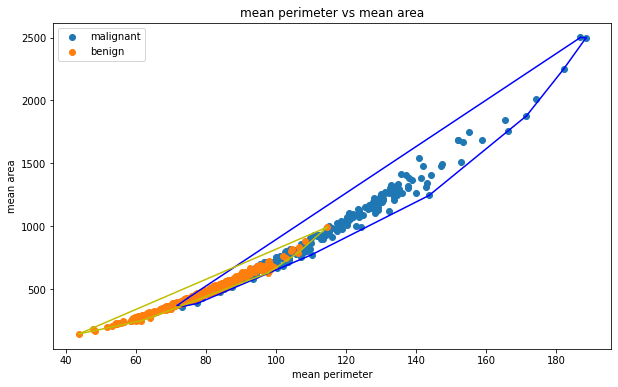

In [10]:
plt.figure(figsize = (10, 6))
colors = ['b', 'y', 'g', 'r', 'c', 'm', 'k']
plt.title(f'{breast_cancer.feature_names[2]} vs {breast_cancer.feature_names[3]}')
plt.xlabel(breast_cancer.feature_names[2])
plt.ylabel(breast_cancer.feature_names[3])
for i in range(len(breast_cancer.target_names)):
    bucket = df2[df2['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=breast_cancer.target_names[i])
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i%7])
plt.legend()